### `Data Analysis Project`
#### `In this project I'll use Airbnb data for Broward Country, Florida, USA`
#### `you can find datasets for many cities at this url: http://insideairbnb.com/get-the-data/`

#### `Airbnb` is an `online marketplace` that connects people who want to rent out their homes or apartments with travelers
who are looking for a place to stay. The platform allows property owners to list their properties for rent, set their own prices, and communicate with potential renters.

### `Quick facts`
`Broward County` is a county in the southeastern part of Florida, located in the Miami metropolitan area.
It is Florida's `second-most populous county` after `Miami-Dade County` and the `17th-most populous` in the `United States`, with over `1,944,375 residents` as of the 2020 census.`Wikipedia`

### `1. Importing Libraries`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, PowerTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from datasist.structdata import detect_outliers

### `2. loading data`

In [2]:
filepath = "./BrowardCounty_Florida_US/listings.csv"
def load_data(filepath):
    """loads dataset and cleans it"""

    df = pd.read_csv(filepath)
    # I will focus on some features that I believe are more important and will drop columns that are all nulls
    columns = ['name','host_name','host_response_time', 'host_response_rate', 'host_acceptance_rate',
            'host_neighbourhood', 'host_total_listings_count', 'neighbourhood', 'latitude', 'longitude',
            'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds', 'price','availability_365',
            'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']
    df = df[columns]
    # for columns with % of null less than 10% drop null values
    nulls = (df.isna().sum() / df.shape[0] * 100)
    subset = [col for col in nulls.index if nulls[col] < 10 and nulls[col] > 0]

    df.dropna(subset=subset, axis=0, inplace=True)
    df.rename(columns={'neighbourhood': 'city', 'host_total_listings_count': 'numOfListings'}, inplace=True)
    
    return df
    

In [3]:
df = load_data(filepath)
df.head()

,name,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,numOfListings,city,latitude,longitude,...,accommodates,bedrooms,beds,price,availability_365,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,reviews_per_month
0,Legion 1BR/1BA,Sean,within an hour,100%,94%,Cumberland,3.0,NaN,26.093936,-80.137591,...,2,1.0,1.0,$222.00,356,1,365,0,NaN,NaN
1,Club Wyndham Royal Vista,Ryan,within an hour,98%,16%,Waikiki,112.0,NaN,26.223850,-80.090990,...,2,2.0,4.0,$500.00,365,1,365,0,NaN,NaN
2,Relaxing 5 Acre Ranch home with private pond!,Maggie,within an hour,100%,89%,Upper East Side,3.0,NaN,26.033899,-80.334605,...,8,4.0,6.0,$500.00,89,2,365,2,5.00,0.65
3,Beach Escape – One Block from the Beach!,Steve And Jo,within an hour,100%,100%,NaN,12.0,"Pompano Beach, Florida, United States",26.229110,-80.092400,...,6,2.0,4.0,$186.00,345,2,1125,129,4.64,2.69
4,MIAMI- AMAZING APARTMENT OVER BEACH,Bianca,within an hour,95%,26%,Sunny Isles Beach,20.0,NaN,25.993770,-80.118300,...,7,2.0,5.0,$297.00,364,7,1125,27,4.61,0.21


### `3. Explore and Clean the Data`

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14072 entries, 0 to 16898
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  14072 non-null  object 
 1   host_name             14072 non-null  object 
 2   host_response_time    14072 non-null  object 
 3   host_response_rate    14072 non-null  object 
 4   host_acceptance_rate  14072 non-null  object 
 5   host_neighbourhood    9523 non-null   object 
 6   numOfListings         14072 non-null  float64
 7   city                  8868 non-null   object 
 8   latitude              14072 non-null  float64
 9   longitude             14072 non-null  float64
 10  property_type         14072 non-null  object 
 11  room_type             14072 non-null  object 
 12  accommodates          14072 non-null  int64  
 13  bedrooms              14072 non-null  float64
 14  beds                  14072 non-null  float64
 15  price              

In [5]:
# Checking missing values
df.isna().sum().sort_values(ascending=False)

city                    5204
host_neighbourhood      4549
reviews_per_month       2046
review_scores_rating    2046
accommodates               0
number_of_reviews          0
maximum_nights             0
minimum_nights             0
availability_365           0
price                      0
beds                       0
bedrooms                   0
name                       0
host_name                  0
property_type              0
longitude                  0
latitude                   0
numOfListings              0
host_acceptance_rate       0
host_response_rate         0
host_response_time         0
room_type                  0
dtype: int64

In [6]:
# show percentage of null values for each column
df.isna().sum().sort_values(ascending=False) / df.shape[0] * 100

city                    36.981239
host_neighbourhood      32.326606
reviews_per_month       14.539511
review_scores_rating    14.539511
accommodates             0.000000
number_of_reviews        0.000000
maximum_nights           0.000000
minimum_nights           0.000000
availability_365         0.000000
price                    0.000000
beds                     0.000000
bedrooms                 0.000000
name                     0.000000
host_name                0.000000
property_type            0.000000
longitude                0.000000
latitude                 0.000000
numOfListings            0.000000
host_acceptance_rate     0.000000
host_response_rate       0.000000
host_response_time       0.000000
room_type                0.000000
dtype: float64

In [7]:
df.describe()

,numOfListings,latitude,longitude,accommodates,bedrooms,beds,availability_365,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,reviews_per_month
count,14072.000000,14072.000000,14072.000000,14072.000000,14072.000000,14072.000000,14072.000000,14072.000000,14072.000000,14072.000000,12026.000000,12026.000000
mean,120.339042,26.102968,-80.144456,5.491970,2.139568,3.160389,228.808201,4.458144,509.966529,28.591956,4.707171,1.704155
std,531.289637,0.098680,0.053747,3.168487,1.366469,2.166691,116.832988,15.433741,430.850632,51.060332,0.455564,1.529037
min,1.000000,25.957323,-80.428120,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.010000
25%,3.000000,26.006857,-80.154110,3.000000,1.000000,2.000000,140.000000,1.000000,120.000000,2.000000,4.620000,0.590000
50%,9.000000,26.110105,-80.126657,5.000000,2.000000,3.000000,260.000000,2.000000,365.000000,11.000000,4.830000,1.290000
75%,36.000000,26.172195,-80.116918,7.000000,3.000000,4.000000,337.000000,3.000000,1125.000000,33.000000,5.000000,2.420000
max,8427.000000,26.332970,-80.075020,16.000000,21.000000,20.000000,365.000000,999.000000,1500.000000,815.000000,5.000000,30.150000


In [8]:
df.nunique()

name                    13443
host_name                2990
host_response_time          4
host_response_rate         61
host_acceptance_rate       90
host_neighbourhood        412
numOfListings             185
city                       60
latitude                10119
longitude                8601
property_type              67
room_type                   4
accommodates               16
bedrooms                   13
beds                       20
price                    1196
availability_365          366
minimum_nights             52
maximum_nights            146
number_of_reviews         335
review_scores_rating      154
reviews_per_month         726
dtype: int64

In [9]:
for name in sorted(df['host_name'].unique()):
    print(name)

(Email hidden by Airbnb)
112 Percent Pure Llc
14th St Rentals
A.J.
AA Enterprises
AC Hotel Sawgrass Mills
ALex
AMG Luxe
Aaliyah
Aaron
Aaron Isaac
Abati
Abey
Abigail
Abir
Abolfazl
Abraham
Abundance
Ace
Active Traveler Deals
Ada
Adam
Addison
Adi
Adina
Adir
Adlene
Adler
Adley
Adnan
Adon
Adrian
Adrian & Veronica
Adriana
Adrienne
Afie
Afolabi
Aglita
Agostina
Agustin
Ahmad
Ahmed
Ahnnah
Aior
Airbnb Host
Aixa Roversi De
Aka
Akayja
Al
Alain
Alan
Alanna
Alba
Albaro
Albert
Albert Milton
Alberto
Alda
Aldo
Ale
Ale And Pam
Alec
Alecia
Alef
Alegna
Alejandra
Alejandro
Alejandro S
Aleks
Aleksey
Alen
Alena
Alenka
Alessandro
Alex
Alex & John
Alex & Sue
Alexa
Alexander
Alexandr
Alexandra
Alexandre
Alexandria
Alexis
Alexus
Alexzandra
Alfanzo
Alfonso
Alfredo
Alfredo And Hannah
Ali
Alican
Alicia
Alida
Alina
Alina And Ashley
Aline
Alison
Alizé
All
Alla
Allen
Allison
Alluring Stays
Ally & Horacio
Almog
Alona
Alperen
Alvaro
Alvin
Alwyn
Aly
Amado
Amal And Farrah
Amalia
Amaliya
Amancio
Amanda
Amaurid
Amber
Amden


In [10]:
df[df['host_name'] == "(Email hidden by Airbnb)"]

,name,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,numOfListings,city,latitude,longitude,...,accommodates,bedrooms,beds,price,availability_365,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,reviews_per_month
7785,Ft Lauderdale Beach - Prime Location w/ (pool),(Email hidden by Airbnb),within a day,100%,0%,NaN,3.0,NaN,26.16361,-80.10238,...,4,2.0,2.0,$105.00,238,14,365,4,4.0,0.05
15963,Beach Condo - Ft Lauderdale,(Email hidden by Airbnb),within a day,100%,0%,NaN,3.0,NaN,26.16204,-80.10033,...,4,2.0,2.0,$105.00,282,14,1125,0,NaN,NaN


In [11]:
indx = df[df['host_name'] == "(Email hidden by Airbnb)"].index

In [12]:
df.drop(indx, inplace=True)

In [13]:
df['host_response_time'].unique()

array(['within an hour', 'within a few hours', 'within a day',
       'a few days or more'], dtype=object)

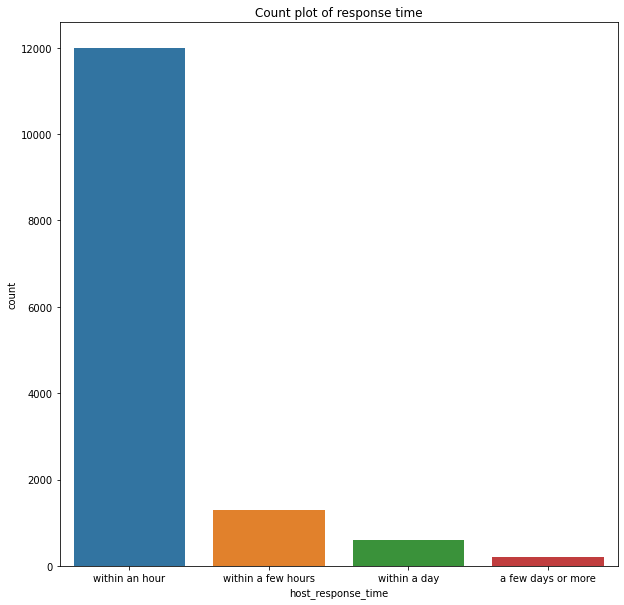

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, x='host_response_time')
plt.title('Count plot of response time')
plt.show()

#### `Almost all hosts response to clients within an hour` 

In [15]:
def get_rate(value):
    try:
        return int(value[:-1])
    except:
        return np.nan

In [16]:
df['host_response_rate'].unique()

array(['100%', '98%', '95%', '89%', '0%', '40%', '20%', '74%', '66%',
       '90%', '50%', '99%', '97%', '33%', '78%', '80%', '96%', '87%',
       '93%', '88%', '29%', '91%', '84%', '94%', '70%', '83%', '68%',
       '38%', '67%', '62%', '75%', '86%', '58%', '82%', '43%', '92%',
       '60%', '73%', '77%', '76%', '81%', '46%', '69%', '57%', '30%',
       '63%', '44%', '56%', '36%', '71%', '85%', '13%', '79%', '25%',
       '65%', '53%', '47%', '64%', '52%', '17%', '59%'], dtype=object)

In [17]:
df['host_response_rate'] = df['host_response_rate'].apply(get_rate)
df['host_response_rate'].unique()

array([100,  98,  95,  89,   0,  40,  20,  74,  66,  90,  50,  99,  97,
        33,  78,  80,  96,  87,  93,  88,  29,  91,  84,  94,  70,  83,
        68,  38,  67,  62,  75,  86,  58,  82,  43,  92,  60,  73,  77,
        76,  81,  46,  69,  57,  30,  63,  44,  56,  36,  71,  85,  13,
        79,  25,  65,  53,  47,  64,  52,  17,  59], dtype=int64)

In [18]:
df['host_response_rate'].describe()

count    14070.000000
mean        96.436105
std         11.714233
min          0.000000
25%         99.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: host_response_rate, dtype: float64

In [19]:
df['host_acceptance_rate'].unique()

array(['94%', '16%', '89%', '100%', '26%', '78%', '97%', '20%', '99%',
       '61%', '92%', '95%', '67%', '25%', '33%', '90%', '27%', '98%',
       '66%', '86%', '0%', '75%', '80%', '52%', '59%', '91%', '37%',
       '39%', '96%', '88%', '93%', '62%', '13%', '87%', '65%', '85%',
       '48%', '47%', '76%', '82%', '4%', '50%', '83%', '84%', '71%',
       '70%', '57%', '69%', '44%', '36%', '14%', '40%', '21%', '73%',
       '56%', '54%', '72%', '74%', '68%', '63%', '60%', '43%', '81%',
       '12%', '38%', '46%', '58%', '10%', '64%', '42%', '23%', '79%',
       '6%', '77%', '51%', '45%', '53%', '29%', '41%', '15%', '18%',
       '30%', '31%', '55%', '32%', '17%', '11%', '49%', '9%', '3%'],
      dtype=object)

In [20]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].apply(get_rate)
df['host_acceptance_rate'].unique()

array([ 94,  16,  89, 100,  26,  78,  97,  20,  99,  61,  92,  95,  67,
        25,  33,  90,  27,  98,  66,  86,   0,  75,  80,  52,  59,  91,
        37,  39,  96,  88,  93,  62,  13,  87,  65,  85,  48,  47,  76,
        82,   4,  50,  83,  84,  71,  70,  57,  69,  44,  36,  14,  40,
        21,  73,  56,  54,  72,  74,  68,  63,  60,  43,  81,  12,  38,
        46,  58,  10,  64,  42,  23,  79,   6,  77,  51,  45,  53,  29,
        41,  15,  18,  30,  31,  55,  32,  17,  11,  49,   9,   3],
      dtype=int64)

In [21]:
# most 20 listing neighbourhoods
df['host_neighbourhood'].value_counts().head(20)

Hollywood South Central Beach    1048
Hollywood Beach                   724
Sunny Isles Beach                 513
Hollywood Lakes                   436
North Fort Lauderdale             419
Victoria Park                     336
East Fort Lauderdale              328
Central Beach Alliance            220
South Middle River                159
South Fort Lauderdale             148
Hollywood Hills                   146
Poinsettia Heights                144
Croissant Park                    135
North Central                     131
Central Fort Lauderdale           124
Royal Poinciana                   122
Coral Ridge Country Club          121
Downtown Las Vegas                120
Brickell                          116
River Oaks                        113
Name: host_neighbourhood, dtype: int64

In [22]:
df['host_neighbourhood'] = df['host_neighbourhood'].str.lower()

In [23]:
most_20 = df['host_neighbourhood'].value_counts().head(20)
px.bar(data_frame=most_20, x='host_neighbourhood', title='most 20 listing neighbourhoods')

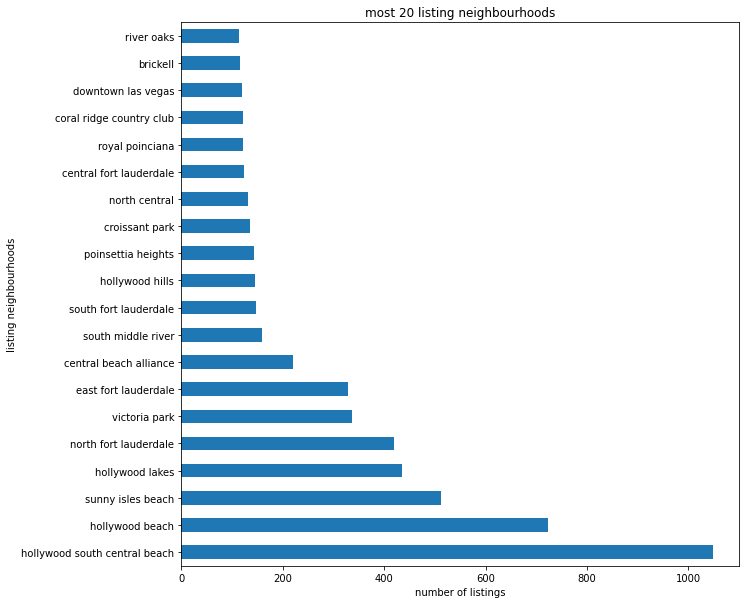

In [24]:
plt.figure(figsize=(10,10))
df['host_neighbourhood'].value_counts().head(20).plot(kind='barh')
plt.title('most 20 listing neighbourhoods')
plt.xlabel('number of listings')
plt.ylabel('listing neighbourhoods')
plt.show()

In [25]:
df['city'].unique()

array([nan, 'Pompano Beach, Florida, United States',
       'Deerfield Beach, Florida, United States',
       'Oakland Park, Florida, United States',
       'Fort Lauderdale, Florida, United States',
       'Lauderdale-by-the-Sea, Florida, United States',
       'Hollywood, Florida, United States',
       'Lighthouse Point, Florida, United States',
       'Coconut Creek, Florida, United States',
       'Wilton Manors, Florida, United States',
       'Hallandale Beach, Florida, United States',
       'Pembroke Pines, Florida, United States',
       'Dania Beach, Florida, United States',
       'West Park, Florida, United States',
       'Hillsboro Beach, Florida, United States',
       'Plantation, Florida, United States',
       'Davie, Florida, United States', 'Weston, Florida, United States',
       'Lazy Lake, Florida, United States',
       'Miami Hollywood , Florida, United States',
       'Miramar, Florida, United States',
       'Ft. Lauderdale, Florida, United States',
       '

In [26]:
df['city'][20].split(',')[0].strip()

'Pompano Beach'

In [27]:
df['city'] = df['city'].str.lower()

In [28]:
def get_city(value):
    try:
        return value.split(',')[0].strip()
    except:
        return np.nan

In [29]:
df['city'] = df['city'].apply(get_city)
df['city'].unique()

array([nan, 'pompano beach', 'deerfield beach', 'oakland park',
       'fort lauderdale', 'lauderdale-by-the-sea', 'hollywood',
       'lighthouse point', 'coconut creek', 'wilton manors',
       'hallandale beach', 'pembroke pines', 'dania beach', 'west park',
       'hillsboro beach', 'plantation', 'davie', 'weston', 'lazy lake',
       'miami hollywood', 'miramar', 'ft. lauderdale', 'north lauderdale',
       'sunrise', 'tamarac', 'lauderdale lakes', 'coral springs',
       'margate', 'hollywood beach', 'halndle bch', 'cooper city',
       'lauderhill', 'southwest ranches', 'parkland', 'miami',
       'pembroke park', 'dania', 'port laudania', 'miami gardens',
       'hallandale', 'miami beach', 'lauderdale by the sea',
       'hallandale hollywood'], dtype=object)

In [30]:
# from geopy.geocoders import Nominatim

# geolocator = Nominatim(user_agent="geoapiExercises")

# def get_city(df):
#     try:
#         location = geolocator.reverse(f"{df['latitude']}, {df['longitude']}")
#         return location.raw['address']['city']
#     except:
#         return np.nan

# df['geoCity'] = df.apply(get_city, axis=1)
# df.head()

In [31]:
df['property_type'] = df['property_type'].str.lower()
df['property_type'].unique()

array(['entire rental unit', 'private room in resort', 'entire home',
       'entire condo', 'entire guest suite', 'private room in home',
       'entire villa', 'entire serviced apartment',
       'entire vacation home', 'private room in townhouse',
       'private room in guesthouse', 'private room in condo',
       'room in hotel', 'room in aparthotel', 'entire townhouse',
       'private room in rental unit', 'shared room in home',
       'private room in bed and breakfast', 'room in boutique hotel',
       'entire cottage', 'entire guesthouse', 'camper/rv', 'lighthouse',
       'private room in villa', 'houseboat', 'entire bungalow',
       'private room in casa particular', 'entire place',
       'shared room in guest suite', 'private room in guest suite',
       'private room in bungalow', 'private room in vacation home',
       'entire loft', 'private room in tent', 'private room in minsu',
       'room in bed and breakfast', 'private room in serviced apartment',
       'shared

In [32]:
def fix_property_type(value):
    try:
        if 'private' in value:
            return 'private room'
        elif 'shared' in value:
            return 'shared room'
        elif 'entire' in value:
            return 'entire property'
        else:
            return 'other'
    except:
        return 'other'

In [33]:
df['property_type'] = df['property_type'].apply(fix_property_type)
df['property_type'].unique()

array(['entire property', 'private room', 'other', 'shared room'],
      dtype=object)

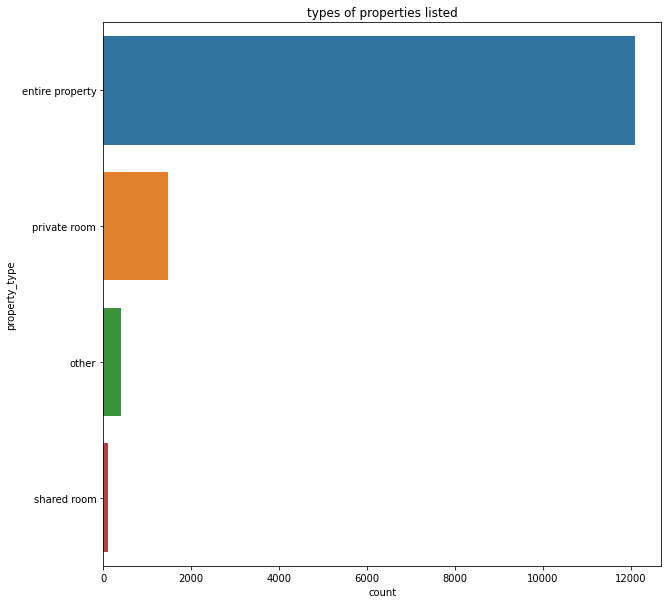

In [34]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, y='property_type')
plt.title('types of properties listed')
plt.show()

In [35]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

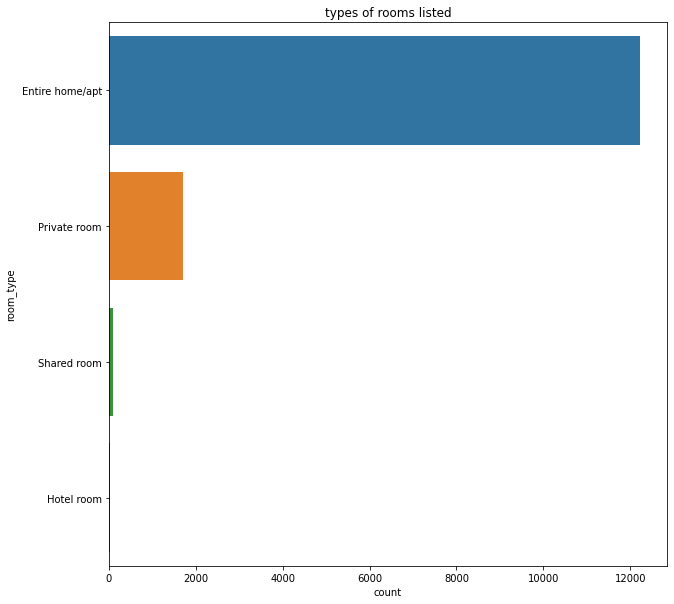

In [36]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, y='room_type')
plt.title('types of rooms listed')
plt.show()

In [37]:
df['room_type'].value_counts()

Entire home/apt    12232
Private room        1710
Shared room           99
Hotel room            29
Name: room_type, dtype: int64

In [38]:
df['property_type'].value_counts()

entire property    12088
private room        1477
other                406
shared room           99
Name: property_type, dtype: int64

In [39]:
# property type and room type are almost the same so drop one of them 
df.drop(columns='property_type', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14070 entries, 0 to 16898
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  14070 non-null  object 
 1   host_name             14070 non-null  object 
 2   host_response_time    14070 non-null  object 
 3   host_response_rate    14070 non-null  int64  
 4   host_acceptance_rate  14070 non-null  int64  
 5   host_neighbourhood    9523 non-null   object 
 6   numOfListings         14070 non-null  float64
 7   city                  8868 non-null   object 
 8   latitude              14070 non-null  float64
 9   longitude             14070 non-null  float64
 10  room_type             14070 non-null  object 
 11  accommodates          14070 non-null  int64  
 12  bedrooms              14070 non-null  float64
 13  beds                  14070 non-null  float64
 14  price                 14070 non-null  object 
 15  availability_365   

In [40]:
df.columns

Index(['name', 'host_name', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_neighbourhood', 'numOfListings', 'city',
       'latitude', 'longitude', 'room_type', 'accommodates', 'bedrooms',
       'beds', 'price', 'availability_365', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating', 'reviews_per_month'],
      dtype='object')

In [41]:
for col in df.columns[11:-1]:
    print(col + ":", df[col].unique())
    print("=========================================================")

accommodates: [ 2  8  6  7  4  3 16  9  5  1 10 13 12 11 14 15]
bedrooms: [ 1.  2.  4.  6.  3.  5.  8.  7. 11.  9. 21. 10. 12.]
beds: [ 1.  4.  6.  5.  2. 12.  3.  7.  9.  8. 11. 10. 17. 14. 15. 19. 13. 16.
 18. 20.]
price: ['$222.00' '$500.00' '$186.00' ... '$3,714.00' '$1,195.00' '$985.00']
availability_365: [356 365  89 345 364 310   6 147 332 299 347 134 354 325 348 283  23 259
 333  14  25 359 221  62 322 308 319 108 238 362 355 344 270 363  39 300
 338 306 174 151  93 166 313 248 188 182 266 120 212 253 271 268 277 236
 222 339 214 143 261 244 260 201 357 114 256 161 331 170 131 233 223 255
 361 128 180 321 340  76   9 173 334   5 349 146 113  19 318 336 350 312
 227 269  91 165   0 171  90 360 137 295 194  56 217 160 326 263  85 264
 240 327 246  94  72 209 346  43 230  78 293 168 343 258 294  71 140 197
 124 351  51 250 162 239 127 157 169 316 107 102 167 226   4 272 235 211
 181 213 285 178 278 303 110  63  28 154 129 164 342 243 296 335 329 358
 341  45  88 153 305 135  53  6

In [42]:
def fix_price(value):
    try:
        return float(value.replace('$', '').replace(',', ''))
    except:
        return np.nan

df['price'] = df['price'].apply(fix_price)

In [43]:
df[df['price'] == df['price'].max()]

,name,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,numOfListings,city,latitude,longitude,...,accommodates,bedrooms,beds,price,availability_365,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,reviews_per_month
5468,Enjoy Peace & tranquillity. A home away from home,Reginald,within a few hours,89,93,NaN,1.0,NaN,26.02708,-80.24724,...,6,2.0,2.0,100000.0,365,3,1125,14,4.79,1.03


In [44]:
indx = df[df['price'] == df['price'].max()].index
indx

Int64Index([5468], dtype='int64')

In [45]:
df.drop(indx, inplace=True)
df[df['price'] == df['price'].max()]

,name,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,numOfListings,city,latitude,longitude,...,accommodates,bedrooms,beds,price,availability_365,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,reviews_per_month
2386,112' MEGA YACHT IN FLL/MIAMI -- Checkered Past,Cristina,within a few hours,84,64,bermuda riviera,10.0,NaN,26.18013,-80.09977,...,8,4.0,5.0,15000.0,363,1,1125,0,NaN,NaN


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14069 entries, 0 to 16898
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  14069 non-null  object 
 1   host_name             14069 non-null  object 
 2   host_response_time    14069 non-null  object 
 3   host_response_rate    14069 non-null  int64  
 4   host_acceptance_rate  14069 non-null  int64  
 5   host_neighbourhood    9523 non-null   object 
 6   numOfListings         14069 non-null  float64
 7   city                  8868 non-null   object 
 8   latitude              14069 non-null  float64
 9   longitude             14069 non-null  float64
 10  room_type             14069 non-null  object 
 11  accommodates          14069 non-null  int64  
 12  bedrooms              14069 non-null  float64
 13  beds                  14069 non-null  float64
 14  price                 14069 non-null  float64
 15  availability_365   

In [47]:
(df['availability_365'] // 30 ).unique()

array([11, 12,  2, 10,  0,  4,  9,  8,  7,  3,  1,  5,  6], dtype=int64)

In [48]:
df['availability_365'].nunique()

366

### We can consider availability_365 as categorical with 366 different category so will group them into 13 categories
`{0: 'unavailable', 1: 'one_month', 2: 'two_months', ....]`

In [49]:
df['availability_365'] = df['availability_365'] // 30
df['availability_365'].unique()

array([11, 12,  2, 10,  0,  4,  9,  8,  7,  3,  1,  5,  6], dtype=int64)

In [50]:
df['review_scores_rating'].unique()

array([ nan, 5.  , 4.64, 4.61, 4.58, 4.86, 4.94, 4.56, 4.66, 4.78, 4.1 ,
       4.98, 4.97, 4.88, 4.84, 4.73, 4.  , 4.5 , 4.96, 4.82, 4.93, 4.27,
       4.76, 4.57, 4.3 , 4.83, 4.74, 4.37, 4.6 , 4.19, 4.75, 4.67, 4.89,
       4.8 , 4.33, 4.72, 4.95, 1.  , 4.38, 4.25, 4.79, 3.67, 3.9 , 4.22,
       4.42, 4.71, 4.7 , 4.4 , 4.44, 4.52, 4.92, 4.43, 4.36, 4.24, 4.59,
       4.2 , 4.63, 4.87, 4.65, 4.99, 4.68, 4.81, 4.54, 4.18, 4.9 , 3.  ,
       4.77, 4.53, 4.91, 3.5 , 4.23, 2.  , 4.55, 4.49, 3.33, 4.02, 0.  ,
       4.85, 4.29, 4.35, 3.43, 4.17, 3.4 , 2.5 , 3.58, 4.47, 3.89, 3.25,
       4.32, 4.69, 4.39, 4.62, 3.77, 3.71, 4.48, 1.5 , 4.31, 3.47, 4.08,
       4.46, 4.45, 4.15, 2.63, 4.09, 4.11, 4.51, 3.88, 4.12, 4.05, 3.76,
       3.98, 4.21, 4.13, 3.75, 4.41, 4.07, 3.93, 3.6 , 4.28, 4.14, 3.8 ,
       3.78, 2.25, 3.79, 3.86, 3.7 , 3.69, 4.34, 4.26, 3.97, 4.06, 3.83,
       3.62, 4.16, 3.2 , 3.92, 4.03, 2.67, 3.91, 4.04, 2.33, 3.82, 2.75,
       3.55, 3.29, 3.84, 3.44, 3.72, 3.07, 3.38, 3.

In [51]:
df['reviews_per_month'].describe()

count    12024.000000
mean         1.704349
std          1.529078
min          0.010000
25%          0.590000
50%          1.290000
75%          2.420000
max         30.150000
Name: reviews_per_month, dtype: float64

### `Detect outliers`

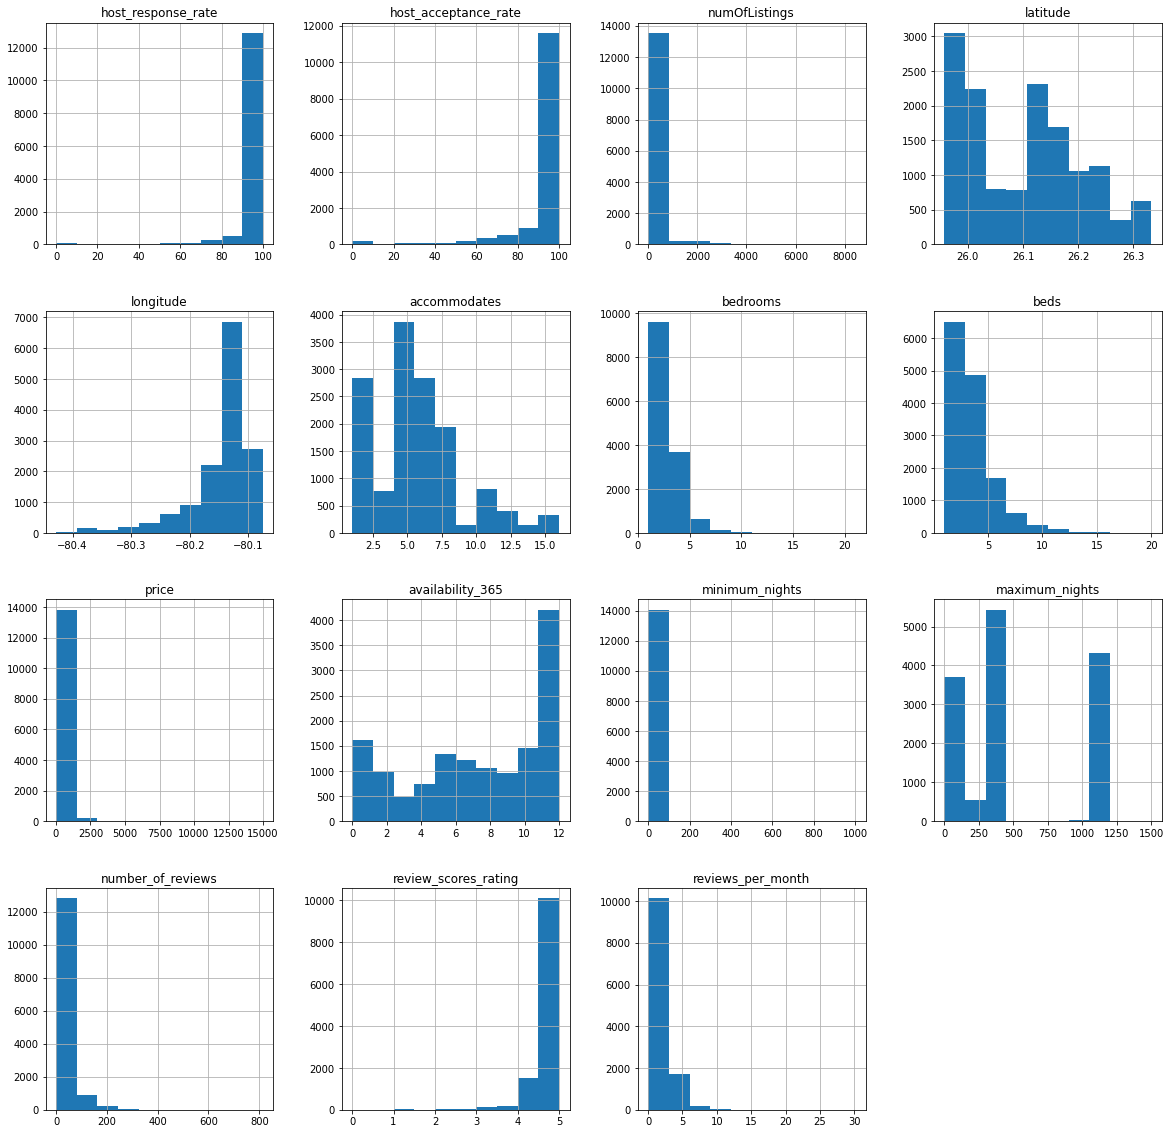

In [52]:
# Using histogram
df.hist(figsize=(20,20))
plt.show()

### It seems that most of the features have outliers and they are left/right skewed
### I will remove outliers more than 0.99 quantile

In [53]:
num_cols = ['host_response_rate','host_acceptance_rate', 'numOfListings', 'bedrooms', 'beds',
            'price', 'minimum_nights', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']
outliers_idx = detect_outliers(df, 0, num_cols)
len(outliers_idx)

7498

##### `Half of the data are outliers so we won't replace them, instead I will use 0.99 quantile`

C:\Users\mahmo\AppData\Local\Temp\ipykernel_8484\1650681191.py:1: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



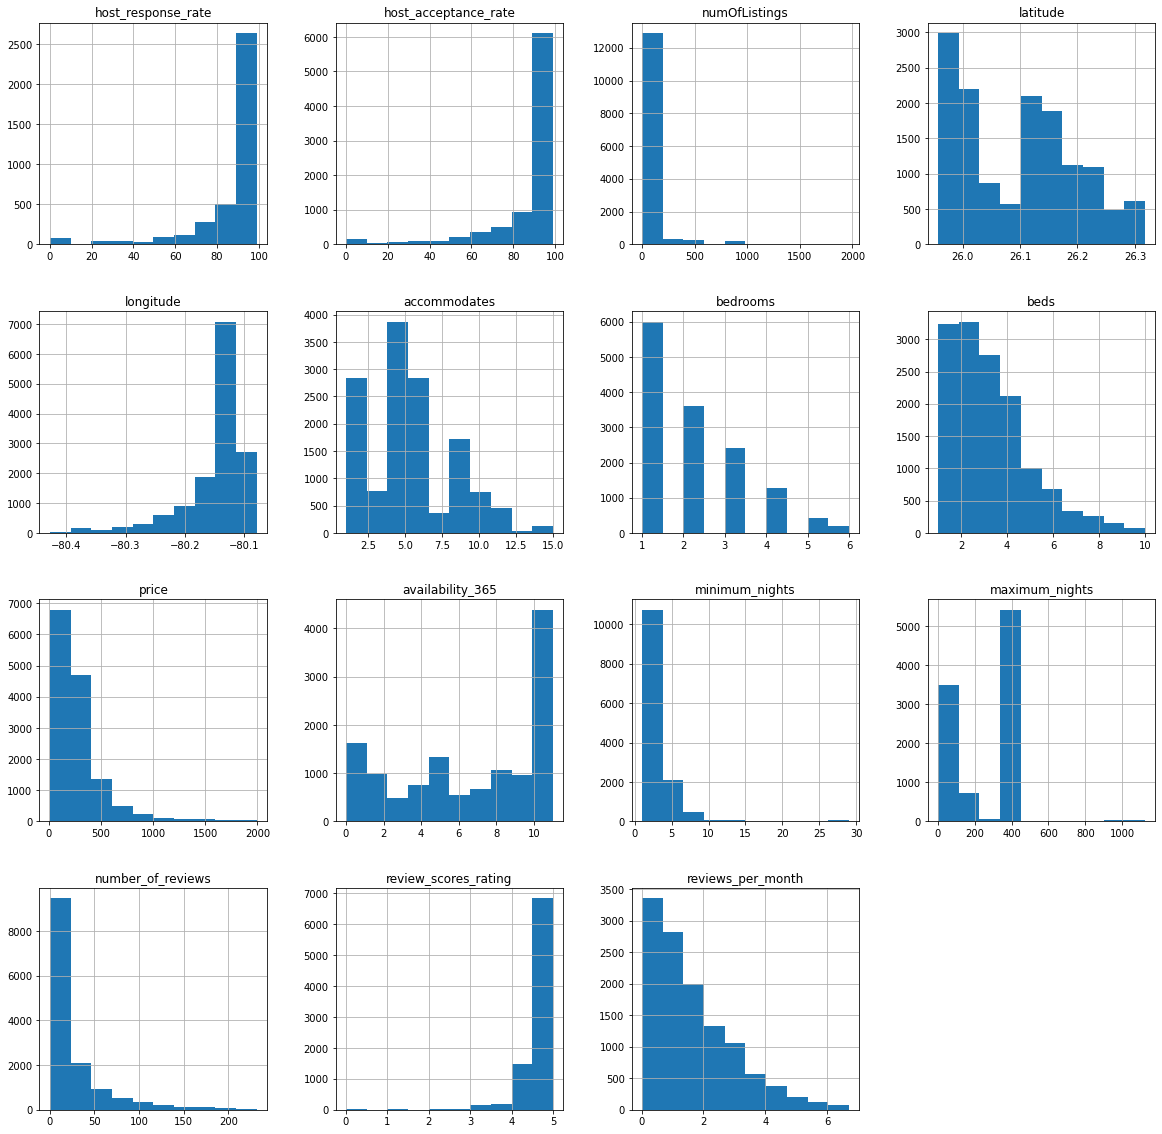

In [54]:
df[df < df.quantile(0.99)].hist(figsize=(20,20))
plt.show()

In [55]:
df_new = df[df < df.quantile(0.99)].copy(deep=True)
df_new.shape

C:\Users\mahmo\AppData\Local\Temp\ipykernel_8484\3755873131.py:1: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



(14069, 21)

In [56]:
# Using boxplot
def box_plot(df, num_cols, shape=(1,1)):
    fig, axs = plt.subplots(shape[0],shape[1], figsize=(20,20))
    i = 0
    for r in range(shape[0]):
        if i == len(num_cols):
            break
        for c in range(shape[1]):    
            plt.sca(axs[r, c])
            sns.boxplot(y=df[num_cols[i]])
            plt.title(num_cols[i] + " box plot")
            i += 1
            if i == len(num_cols):
                break

    plt.show()

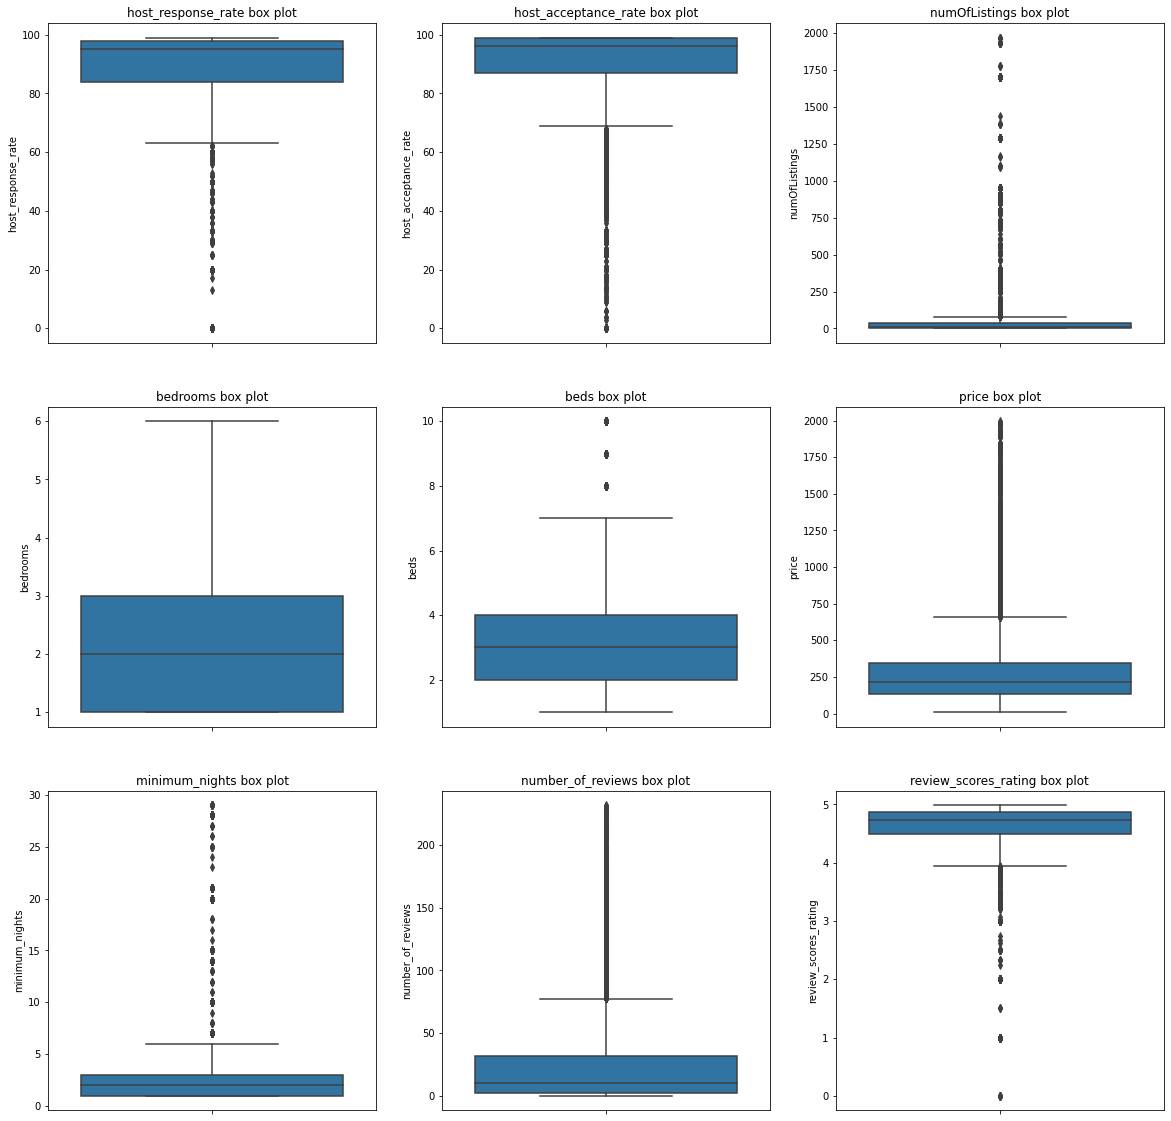

In [57]:
box_plot(df_new, num_cols, (3,3))

In [58]:
df.head()

,name,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,numOfListings,city,latitude,longitude,...,accommodates,bedrooms,beds,price,availability_365,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,reviews_per_month
0,Legion 1BR/1BA,Sean,within an hour,100,94,cumberland,3.0,NaN,26.093936,-80.137591,...,2,1.0,1.0,222.0,11,1,365,0,NaN,NaN
1,Club Wyndham Royal Vista,Ryan,within an hour,98,16,waikiki,112.0,NaN,26.223850,-80.090990,...,2,2.0,4.0,500.0,12,1,365,0,NaN,NaN
2,Relaxing 5 Acre Ranch home with private pond!,Maggie,within an hour,100,89,upper east side,3.0,NaN,26.033899,-80.334605,...,8,4.0,6.0,500.0,2,2,365,2,5.00,0.65
3,Beach Escape – One Block from the Beach!,Steve And Jo,within an hour,100,100,NaN,12.0,pompano beach,26.229110,-80.092400,...,6,2.0,4.0,186.0,11,2,1125,129,4.64,2.69
4,MIAMI- AMAZING APARTMENT OVER BEACH,Bianca,within an hour,95,26,sunny isles beach,20.0,NaN,25.993770,-80.118300,...,7,2.0,5.0,297.0,12,7,1125,27,4.61,0.21


In [59]:
df.columns

Index(['name', 'host_name', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_neighbourhood', 'numOfListings', 'city',
       'latitude', 'longitude', 'room_type', 'accommodates', 'bedrooms',
       'beds', 'price', 'availability_365', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating', 'reviews_per_month'],
      dtype='object')

In [60]:
df.isna().sum().sort_values(ascending=False)

city                    5201
host_neighbourhood      4546
reviews_per_month       2045
review_scores_rating    2045
bedrooms                   0
number_of_reviews          0
maximum_nights             0
minimum_nights             0
availability_365           0
price                      0
beds                       0
name                       0
accommodates               0
host_name                  0
longitude                  0
latitude                   0
numOfListings              0
host_acceptance_rate       0
host_response_rate         0
host_response_time         0
room_type                  0
dtype: int64

In [61]:
df_new = df.copy(deep=True)
cat_cols = ['city', 'host_neighbourhood']
num_cols = ['reviews_per_month', 'review_scores_rating']

cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='median')

df_new[cat_cols] = cat_imputer.fit_transform(df_new[cat_cols])
df_new[num_cols] = num_imputer.fit_transform(df_new[num_cols])
df_new.isna().sum().sort_values(ascending=False)

name                    0
accommodates            0
review_scores_rating    0
number_of_reviews       0
maximum_nights          0
minimum_nights          0
availability_365        0
price                   0
beds                    0
bedrooms                0
room_type               0
host_name               0
longitude               0
latitude                0
city                    0
numOfListings           0
host_neighbourhood      0
host_acceptance_rate    0
host_response_rate      0
host_response_time      0
reviews_per_month       0
dtype: int64

### `EDA`

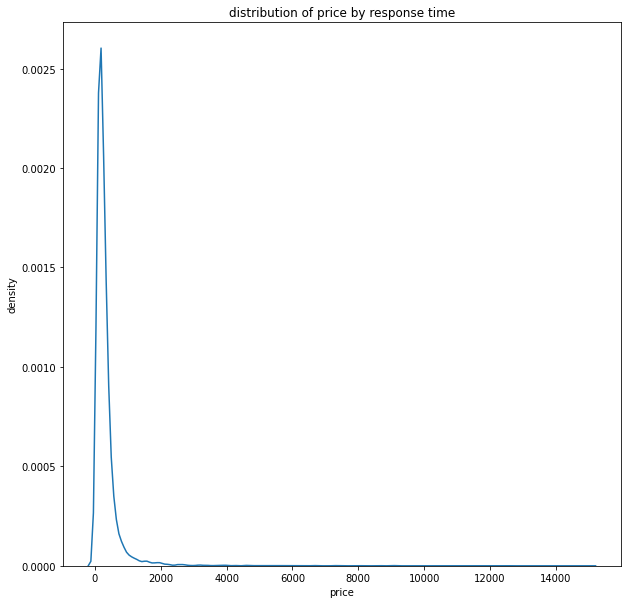

In [62]:
# distribution of price
plt.figure(figsize=(10,10))
sns.kdeplot(data=df_new, x='price')#, hue='host_response_time', multiple='stack', warn_singular=False)
plt.title('distribution of price by response time')
plt.xlabel('price')
plt.ylabel('density')   
plt.show()

In [63]:
df_new[df_new['price'] == df_new['price'].max()]

,name,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,numOfListings,city,latitude,longitude,...,accommodates,bedrooms,beds,price,availability_365,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,reviews_per_month
2386,112' MEGA YACHT IN FLL/MIAMI -- Checkered Past,Cristina,within a few hours,84,64,bermuda riviera,10.0,fort lauderdale,26.18013,-80.09977,...,8,4.0,5.0,15000.0,12,1,1125,0,4.83,1.29


In [64]:
# remove outliers from price 
df_new = df_new[df_new['price'] < 4000]
df_new.shape

(14030, 21)

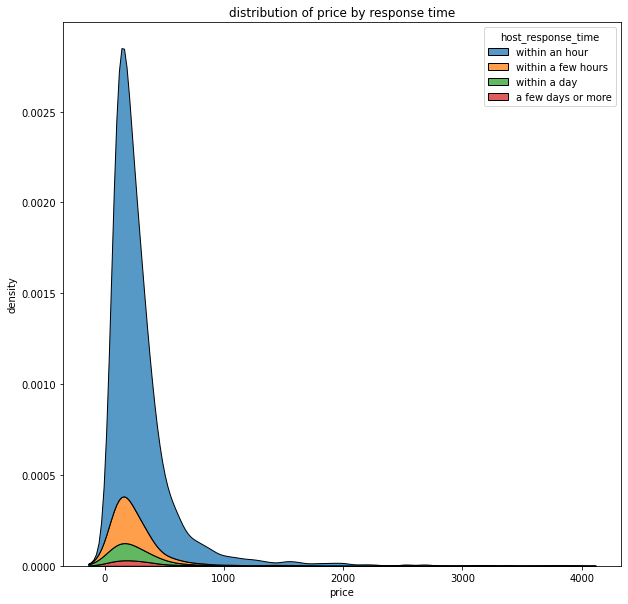

In [65]:
def plot_price(df):
    plt.figure(figsize=(10,10))
    sns.kdeplot(data=df, x='price', hue='host_response_time', multiple='stack', warn_singular=False)
    plt.title('distribution of price by response time')
    plt.xlabel('price')
    plt.ylabel('density')   
    plt.show()

plot_price(df_new)

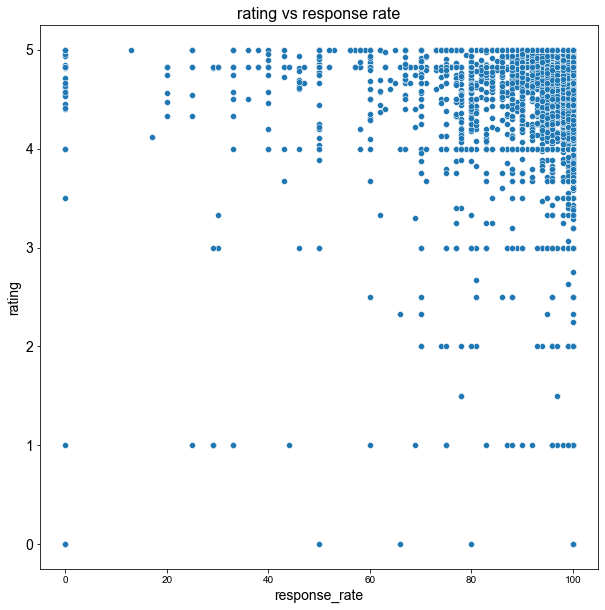

In [66]:
# response rate vs rating
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_new, x='host_response_rate', y='review_scores_rating')
sns.set_style("darkgrid")
plt.title('rating vs response rate', fontsize=16)
plt.xlabel('response_rate', fontsize=14)
plt.ylabel('rating', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

##### `It seems that response rate has a good influence on clients' rating`

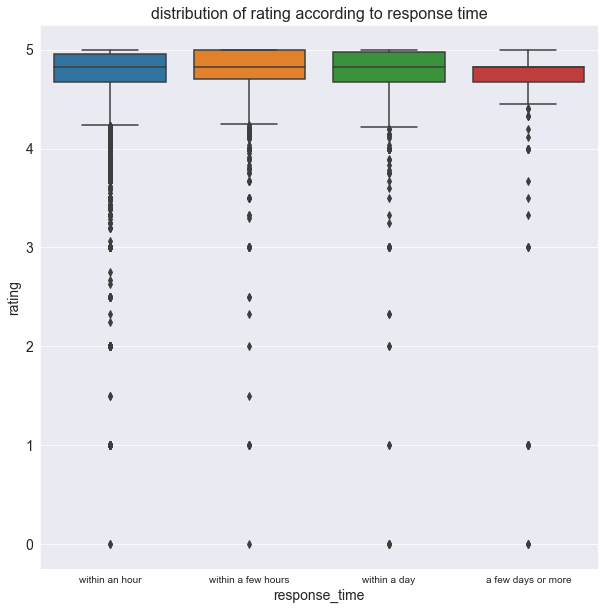

In [67]:
# response time vs rating
plt.figure(figsize=(10,10))
sns.boxplot(data=df_new, x='host_response_time', y='review_scores_rating')
plt.title('distribution of rating according to response time', fontsize=16)
plt.xlabel('response_time', fontsize=14)
plt.ylabel('rating', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

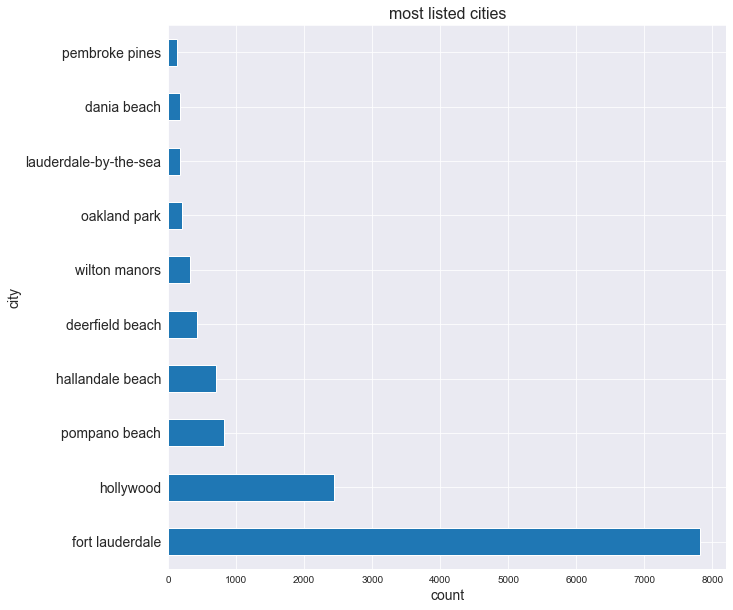

In [68]:
# what are the most listed cities?
plt.figure(figsize=(10,10))
df_new['city'].value_counts().head(10).plot(kind='barh', x='city')
plt.title('most listed cities', fontsize=16)
plt.xlabel('count', fontsize=14)
plt.ylabel('city', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [69]:
df_new.columns

Index(['name', 'host_name', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_neighbourhood', 'numOfListings', 'city',
       'latitude', 'longitude', 'room_type', 'accommodates', 'bedrooms',
       'beds', 'price', 'availability_365', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating', 'reviews_per_month'],
      dtype='object')

#### `Let's answer some questions about the data and find some statistics`
1) Who are the top 10 hosts with highest rating?
2) What are the most expensive neighbourhoods?
3) top ten hosts with highest response rate
4) top ten cities with highest ratings?
5) is the number of accommodates related to the price?
6) most listing room type
7) top 10 cities with highest number of listings?
8) Hosts with most number of listings 

In [70]:
# 1) Who are the top 10 hosts with highest rating?
top_10_hosts = df_new.groupby('host_name')[['review_scores_rating']].max().sort_values(by='review_scores_rating', ascending=False).head(10)
top_10_hosts

,review_scores_rating
host_name,
Isaac,5.0
M Vacation Rental,5.0
Garry,5.0
Lynora,5.0
M & S,5.0
Garrett,5.0
Tanisha,5.0
Scoast Vacation Rentals,5.0
M J,5.0


In [71]:
# 2) What are the most expensive neighbourhoods?
df_new.groupby(['host_neighbourhood','city'])[['price']].max().sort_values(by='price', ascending=False).head(10)

,,price
host_neighbourhood,city,
downtown las vegas,hollywood,3970.0
east fort lauderdale,fort lauderdale,3946.0
las olas isles,fort lauderdale,3857.0
coral way,fort lauderdale,3841.0
coral ridge country club,fort lauderdale,3800.0
coral ridge,fort lauderdale,3714.0
central la,fort lauderdale,3668.0
south beach,fort lauderdale,3588.0
harbour inlet,fort lauderdale,3462.0


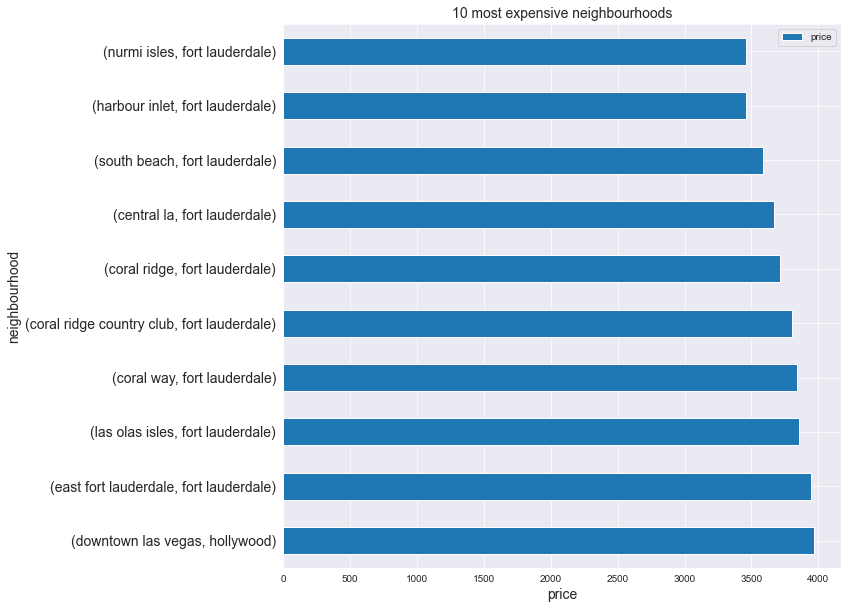

In [72]:
df_new.groupby(['host_neighbourhood','city'])[['price']].max().sort_values(by='price', ascending=False).head(10).plot(kind='barh', figsize=(10,10))
plt.title('10 most expensive neighbourhoods', fontsize=14)
plt.ylabel('neighbourhood', fontsize=14)
plt.xlabel('price', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [73]:
# 3) top ten hosts with highest response rate
df_new.groupby('host_name')[['host_response_rate']].max().sort_values(by='host_response_rate', ascending=False).head(10)


,host_response_rate
host_name,
112 Percent Pure Llc,100
Michel,100
Miami Rent,100
Miami Rent Apart,100
Mica,100
Micaela,100
Michael,100
Michael & Jill,100
Michael And Janell,100


In [74]:
# 4) top ten cities with highest ratings?
df_new.groupby('city')['review_scores_rating'].max().sort_values(ascending=False).head(10)

city
coconut creek       5.0
parkland            5.0
cooper city         5.0
margate             5.0
miami               5.0
miami gardens       5.0
miramar             5.0
north lauderdale    5.0
oakland park        5.0
pembroke pines      5.0
Name: review_scores_rating, dtype: float64

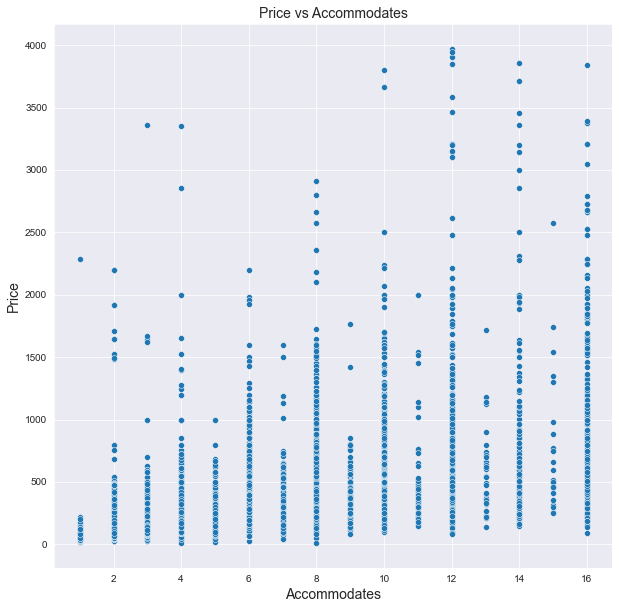

In [75]:
# 5) is the number of accommodates related to the price?
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_new, x='accommodates', y='price')
plt.title('Price vs Accommodates', fontsize=14)
plt.xlabel('Accommodates', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

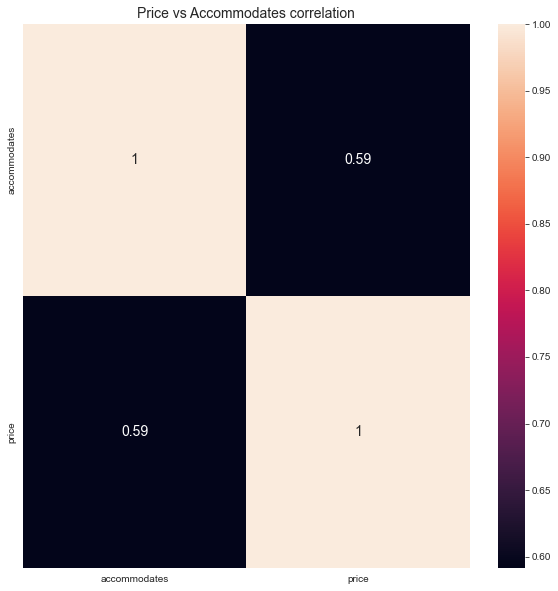

In [76]:
plt.figure(figsize=(10,10))
sns.heatmap(df_new[['accommodates', 'price']].corr(), annot=True, annot_kws={'fontsize':14})
plt.title('Price vs Accommodates correlation', fontsize=14)
plt.show()

#### `It seems that the accommodating is related to price as by accommodates go high the property size increases which leads to higher price`

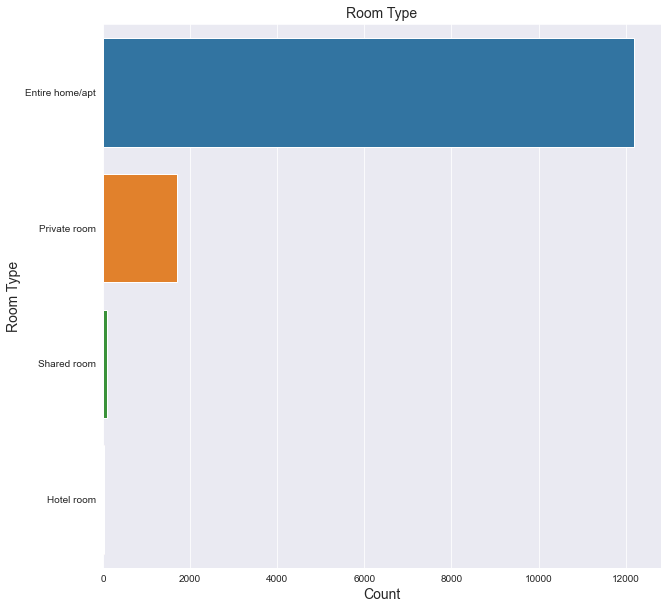

In [77]:
# 6) most listing room type
plt.figure(figsize=(10,10))
sns.countplot(data=df_new, y='room_type')
plt.title('Room Type', fontsize=14)
plt.ylabel('Room Type', fontsize=14)
plt.xlabel('Count', fontsize=14)
plt.show()

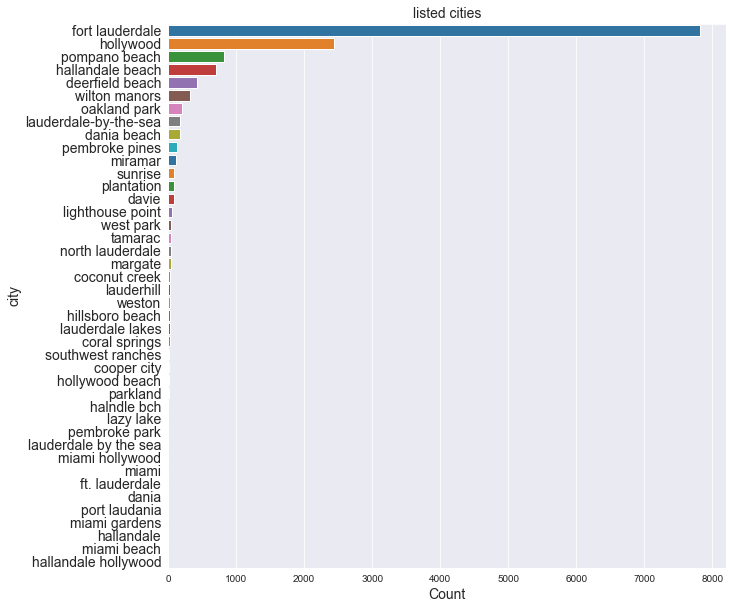

In [78]:
# 7) top 10 cities with highest number of listings?
plt.figure(figsize=(10,10))
sns.countplot(data=df_new, y='city', palette=sns.color_palette(), order=df_new['city'].value_counts().index)
plt.title('listed cities', fontsize=14)
plt.ylabel('city', fontsize=14)
plt.xlabel('Count', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

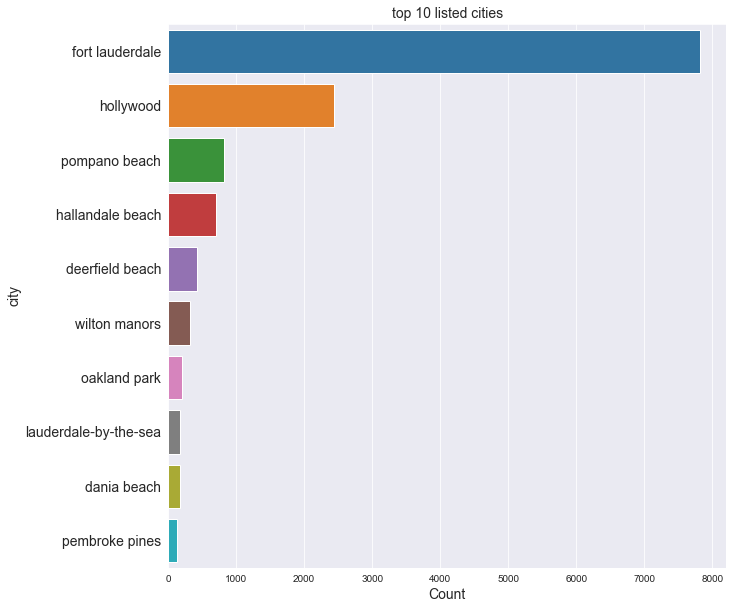

In [79]:
top_10_listed_cities = df_new['city'].value_counts()[:10].index
plt.figure(figsize=(10,10))
sns.countplot(data=df_new[df_new['city'].isin(top_10_listed_cities)], y='city', order=top_10_listed_cities)
plt.title('top 10 listed cities', fontsize=14)
plt.ylabel('city', fontsize=14)
plt.xlabel('Count', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [80]:
# 8) Hosts with most number of listings 
df_new.groupby('host_name')[['numOfListings']].sum().sort_values(by='numOfListings', ascending=False).head(10)

,numOfListings
host_name,
RoomPicks,556788.0
LiveSuite.Io,197096.0
Vacasa Florida,160287.0
Stay Sol,97137.0
Evolve,84133.0
Blueground,53750.0
Ricardo,43513.0
RoomPicks By Victoria,42135.0
Jan,32816.0


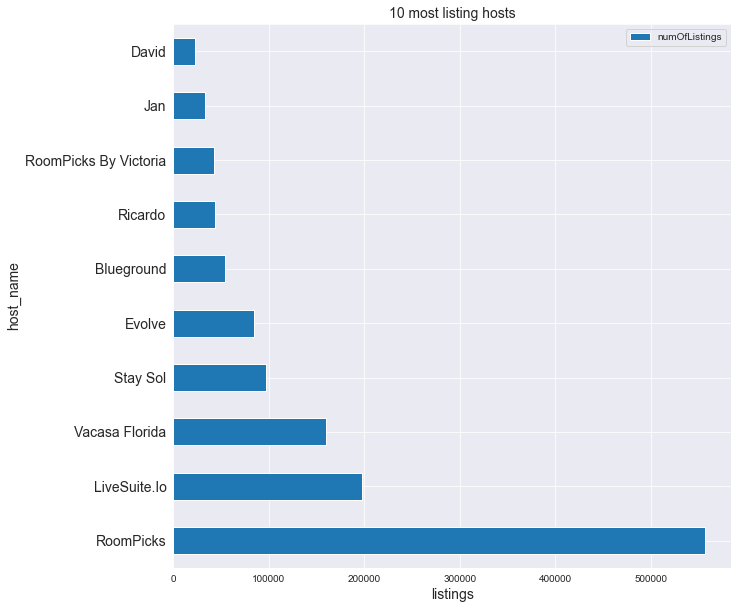

In [81]:
df_new.groupby('host_name')[['numOfListings']].sum().sort_values(by='numOfListings', ascending=False).head(10).plot(kind='barh', figsize=(10,10))
plt.title('10 most listing hosts', fontsize=14)
plt.ylabel('host_name', fontsize=14)
plt.xlabel('listings', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

<AxesSubplot: >

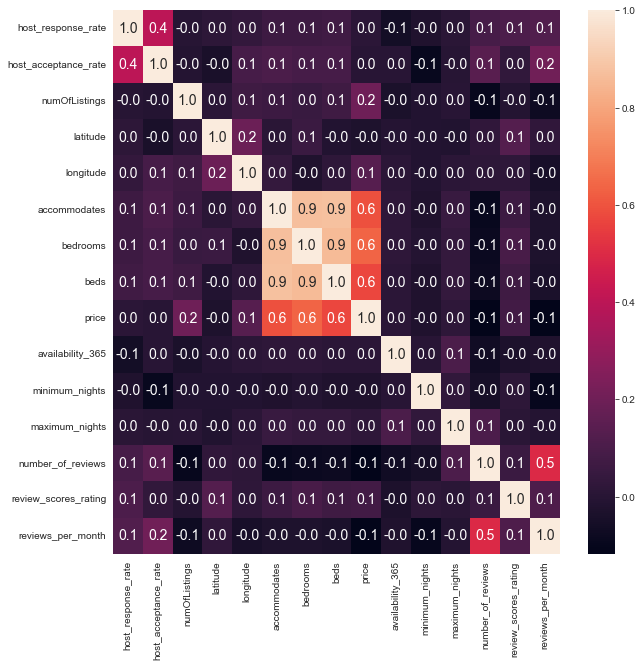

In [82]:
plt.figure(figsize=(10,10))
sns.heatmap(df_new.corr(), annot=True, annot_kws={'fontsize':14}, fmt='0.1f')

### `scatter matrix`

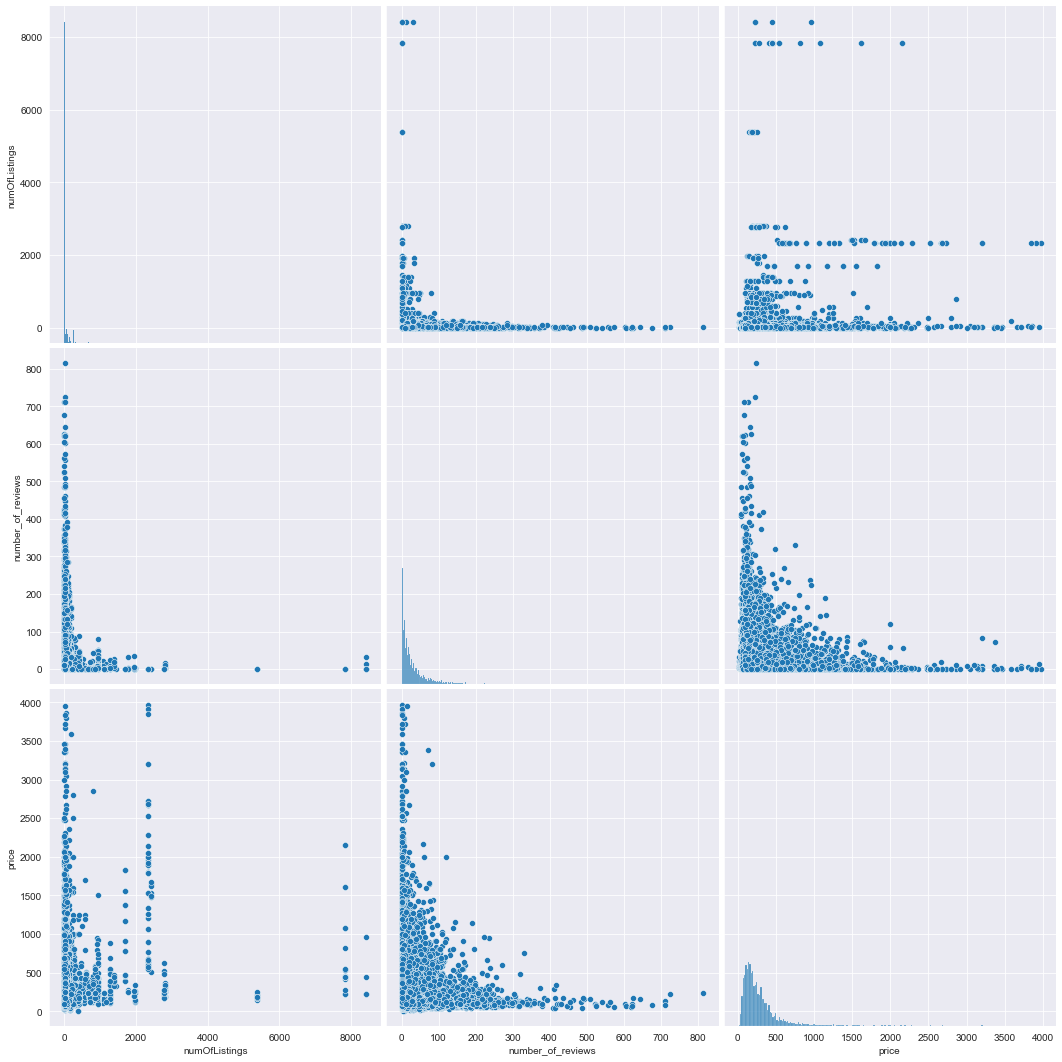

In [83]:
sns.pairplot(df_new[['numOfListings', 'host_response_time', 'number_of_reviews', 'price']], height=5, aspect=1)

#### `Split data and pipeline`

In [84]:
# Features and target
X = df_new.drop(columns=['price', 'name', 'host_name', 'latitude', 'longitude', 'minimum_nights', 'maximum_nights', 'host_response_rate', 'host_acceptance_rate'])
y = df_new['price']

print("X.shape:", X.shape)
print("y.shape:", y.shape)

X.shape: (14030, 12)
y.shape: (14030,)


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (11224, 12)
y_train.shape: (11224,)
X_test.shape: (2806, 12)
y_test.shape: (2806,)


In [86]:
X_train.columns

Index(['host_response_time', 'host_neighbourhood', 'numOfListings', 'city',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'reviews_per_month'],
      dtype='object')

In [87]:
num_cols = ['numOfListings', 'accommodates', 'bedrooms',
            'beds','number_of_reviews', 'review_scores_rating', 'reviews_per_month']

cat_cols = ['host_response_time','host_neighbourhood', 'city', 'room_type']


In [88]:
## Pipelines
num_pipe = Pipeline(steps=[
    ('selector', DataFrameSelector(num_cols)),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', PowerTransformer(method='yeo-johnson'))
])


cat_pipe = Pipeline(steps=[
    ('selector', DataFrameSelector(cat_cols)),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])


## combine all
total_pipe = FeatureUnion(transformer_list=[
    ('num', num_pipe),
    ('categ', cat_pipe)
])

## Fit and Transform
X_train_final = total_pipe.fit_transform(X_train)
X_test_final = total_pipe.transform(X_test)

In [89]:
X_train_final

array([[-5.56866489e-01,  3.81557575e-01,  9.50884645e-01, ...,
         1.48000000e+02,  3.90000000e+01,  0.00000000e+00],
       [-7.59735645e-01, -3.24587675e-01, -1.06879373e+00, ...,
         1.48000000e+02,  6.00000000e+00,  0.00000000e+00],
       [ 1.55912180e+00,  9.16960910e-01,  1.35956541e+00, ...,
         1.10000000e+01,  6.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.36453156e+00,  3.81557575e-01,  2.73899659e-01, ...,
         3.11000000e+02,  9.00000000e+00,  0.00000000e+00],
       [-1.04062931e+00,  2.02664980e+00,  1.63333887e+00, ...,
         3.00000000e+01,  6.00000000e+00,  0.00000000e+00],
       [-1.47683925e+00, -1.37370510e+00, -1.06879373e+00, ...,
         1.48000000e+02,  1.20000000e+01,  2.00000000e+00]])

In [90]:
X_test_final

array([[-1.04062931e+00, -1.37370510e+00, -1.06879373e+00, ...,
         1.48000000e+02,  3.50000000e+01,  2.00000000e+00],
       [ 9.00916292e-01, -3.24587675e-01, -1.06879373e+00, ...,
         6.20000000e+01,  6.00000000e+00,  0.00000000e+00],
       [ 2.03228657e+00,  2.30299341e+00,  2.18515299e+00, ...,
         8.00000000e+01,  1.20000000e+01,  0.00000000e+00],
       ...,
       [ 1.27139039e+00, -7.86242615e-01, -1.06879373e+00, ...,
         1.45000000e+02,  9.00000000e+00,  0.00000000e+00],
       [ 1.54677159e+00, -7.86242615e-01, -1.06879373e+00, ...,
         3.11000000e+02,  9.00000000e+00,  0.00000000e+00],
       [ 1.27139039e+00,  3.81557575e-01,  2.73899659e-01, ...,
         1.45000000e+02,  1.20000000e+01,  0.00000000e+00]])